In [1]:
import scipy
import pandas as pd
import numpy as np

In [2]:
dbepdia = pd.read_csv('/data/DBpedia_3_class_full/all.tsv', sep='\t')
wikidata = pd.read_csv('/data/wikidata_3_class_full/all.tsv', sep='\t')

In [4]:
dbepdia


,id,queryString,query_string_0,latency_0,resultset_0,query_string_1,latency_1,resultset_1,query_string_2,latency_2,...,Alternative,ComplexPath,MoreThanOnePredicate,queryID,Queries with 1 TP,Queries with 2 TP,Queries with more TP,S-P Concrete,P-O Concrete,S-O Concrete
0,http://lsq.aksw.org/lsqQuery-cMojQbi34ctqDovih...,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,0.039463,0.0,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,0.011020,0.0,PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-...,0.010479,...,0,0,0,http://lsq.aksw.org/lsqQuery-cMojQbi34ctqDovih...,1,0,0,0,0,0
1,http://lsq.aksw.org/lsqQuery-fCyu4WsbtbD8ISzBN...,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,3.833987,NaN,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,3.727595,NaN,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,3.724324,...,0,0,0,http://lsq.aksw.org/lsqQuery-fCyu4WsbtbD8ISzBN...,0,0,1,0,0,0
2,http://lsq.aksw.org/lsqQuery-HyyXZkhGvOBg4VUpK...,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,0.945466,NaN,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,0.876621,NaN,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,1.062303,...,0,0,0,http://lsq.aksw.org/lsqQuery-HyyXZkhGvOBg4VUpK...,1,0,0,0,0,0
3,http://lsq.aksw.org/lsqQuery-S0g2dVkDVwtyR7_nj...,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,1.462394,NaN,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,1.355471,NaN,PREFIX xsd: <http://www.w3.org/2001/XMLSchema#...,1.153743,...,0,0,0,http://lsq.aksw.org/lsqQuery-S0g2dVkDVwtyR7_nj...,0,0,1,0,0,0
4,http://lsq.aksw.org/lsqQuery-BUjznweAPS_rzY7Lp...,PREFIX dbpr: <http://dbpedia.org/resource/> PR...,PREFIX dbpr: <http://dbpedia.org/resource/> PR...,0.021661,0.0,PREFIX dbpr: <http://dbpedia.org/resource/> PR...,0.034688,0.0,PREFIX dbpr: <http://dbpedia.org/resource/> PR...,0.018396,...,0,0,0,http://lsq.aksw.org/lsqQuery-BUjznweAPS_rzY7Lp...,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18078,http://lsq.aksw.org/lsqQuery-nwTfhUk2DQZKPGSPw...,SELECT ?redirected WHERE { <http://dbpedia.org...,SELECT ?redirected WHERE { <http://dbpedia.org...,0.004066,0.0,SELECT ?redirected WHERE { <http://dbpedia.org...,0.002405,0.0,SELECT ?redirected WHERE { <http://dbpedia.org...,0.003040,...,0,0,0,http://lsq.aksw.org/lsqQuery-nwTfhUk2DQZKPGSPw...,1,0,0,0,0,0
18079,http://lsq.aksw.org/lsqQuery-AYwyZz_hBVu3oCLUF...,SELECT ?redirected WHERE { <http://dbpedia.org...,SELECT ?redirected WHERE { <http://dbpedia.org...,0.003859,0.0,SELECT ?redirected WHERE { <http://dbpedia.org...,0.003280,0.0,SELECT ?redirected WHERE { <http://dbpedia.org...,0.003085,...,0,0,0,http://lsq.aksw.org/lsqQuery-AYwyZz_hBVu3oCLUF...,1,0,0,0,0,0
18080,http://lsq.aksw.org/lsqQuery-MbVji3flufA2-O25J...,PREFIX planet: <http://dbpedia.org/> PREFIX db...,PREFIX planet: <http://dbpedia.org/> PREFIX db...,0.004743,0.0,PREFIX planet: <http://dbpedia.org/> PREFIX db...,0.002488,0.0,PREFIX planet: <http://dbpedia.org/> PREFIX db...,0.002415,...,0,0,0,http://lsq.aksw.org/lsqQuery-MbVji3flufA2-O25J...,1,0,0,0,0,0
18081,http://lsq.aksw.org/lsqQuery-RK_gK6vipuC9f2HuJ...,SELECT ?redirected WHERE { <http://dbpedia.org...,SELECT ?redirected WHERE { <http://dbpedia.org...,0.004685,0.0,SELECT ?redirected WHERE { <http://dbpedia.org...,0.003056,0.0,SELECT ?redirected WHERE { <http://dbpedia.org...,0.002386,...,0,0,0,http://lsq.aksw.org/lsqQuery-RK_gK6vipuC9f2HuJ...,1,0,0,0,0,0


In [5]:
num_bins = 3

In [6]:
def equi_width_bins(lst, num_bins):
    hist, bins = np.histogram(lst, bins=num_bins)
    print("Bin Edges:", bins)
    print("Histogram Counts:", hist)
    return bins

equi_width_bins(dbepdia['mean_latency'], num_bins)

Bin Edges: [2.33282273e-03 3.00001555e+02 6.00000778e+02 9.00000000e+02]
Histogram Counts: [17808    57   218]


array([2.33282273e-03, 3.00001555e+02, 6.00000778e+02, 9.00000000e+02])

In [8]:

def binned_mean(lst, num_bins):
    result = scipy.stats.binned_statistic(lst, lst, bins=num_bins, statistic='mean')
    #'sum for statistics another option
    bin_edges = result.bin_edges
    bin_means = result.statistic

    # Print the result
    print("Bin Edges:", bin_edges)
    print("Binned Mean:", bin_means)
    return bin_edges

binned_mean(dbepdia['mean_latency'], num_bins)

Bin Edges: [2.33282273e-03 3.00001555e+02 6.00000778e+02 9.00000000e+02]
Binned Mean: [239812.86133971  23908.38442222 192677.34998773]


array([2.33282273e-03, 3.00001555e+02, 6.00000778e+02, 9.00000000e+02])

In [9]:


density(dbepdia['mean_latency'], num_bins)

Bin Edges: [2.33282273e-03 3.00001555e+02 6.00000778e+02 9.00000000e+02]
Histogram Counts: [3.28264966e-03 1.05071334e-05 4.01851767e-05]


array([2.33282273e-03, 3.00001555e+02, 6.00000778e+02, 9.00000000e+02])

Bin Edges: [2.33282273e-03 1.49723140e-02 1.93104452e+00 9.00000000e+02]
Frequency: [6028. 6028. 6027.]


array([2.33282273e-03, 1.49723140e-02, 1.93104452e+00, 9.00000000e+02])

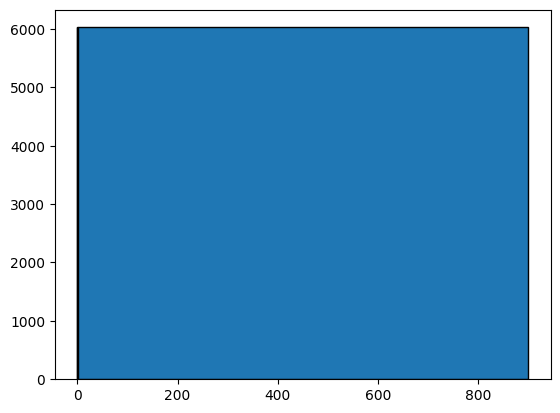

In [12]:
import matplotlib.pyplot as plt
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

def equi_freq_bins(lst, num_bins):
    n, bins, patches = plt.hist(lst, equalObs(lst, num_bins), edgecolor='black')
    print("Bin Edges:", bins)
    print("Frequency:", n)

    return bins

equi_freq_bins(dbepdia['mean_latency'], num_bins)